In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

playground_series_s5e9_path = kagglehub.competition_download('playground-series-s5e9')
mehrankazeminia_s5e9_26_38309_path = kagglehub.dataset_download('mehrankazeminia/s5e9-26-38309')
mehrankazeminia_s5e9_26_38046_path = kagglehub.dataset_download('mehrankazeminia/s5e9-26-38046')
anthonytherrien_predicting_the_beats_per_minute_of_songs_vault_path = kagglehub.dataset_download('anthonytherrien/predicting-the-beats-per-minute-of-songs-vault')
ravi20076_playgrounds5e9addnoise_path = kagglehub.dataset_download('ravi20076/playgrounds5e9addnoise')
ravi20076_playgrounds5e9_lbrace_v1_path = kagglehub.notebook_output_download('ravi20076/playgrounds5e9-lbrace-v1')
princevegeta515_tiny_nudges_big_gains_public_score_26_38135_path = kagglehub.notebook_output_download('princevegeta515/tiny-nudges-big-gains-public-score-26-38135')
mikhailnaumov_beats_per_minute_xgb_lgbm_hgb_nn_ydf_path = kagglehub.notebook_output_download('mikhailnaumov/beats-per-minute-xgb-lgbm-hgb-nn-ydf')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-the-beats-per-minute-of-songs-vault/submission (1).csv
/kaggle/input/predicting-the-beats-per-minute-of-songs-vault/submission.csv
/kaggle/input/predicting-the-beats-per-minute-of-songs-vault/submission (2).csv
/kaggle/input/playground-series-s5e9/sample_submission.csv
/kaggle/input/playground-series-s5e9/train.csv
/kaggle/input/playground-series-s5e9/test.csv
/kaggle/input/s5e9-26-38309/submission.csv
/kaggle/input/mikhailnaumov/beats-per-minute-xgb-lgbm-hgb-nn-ydf/__results__.html
/kaggle/input/mikhailnaumov/beats-per-minute-xgb-lgbm-hgb-nn-ydf/submission.csv
/kaggle/input/mikhailnaumov/beats-per-minute-xgb-lgbm-hgb-nn-ydf/__notebook__.ipynb
/kaggle/input/mikhailnaumov/beats-per-minute-xgb-lgbm-hgb-nn-ydf/__output__.json
/kaggle/input/mikhailnaumov/beats-per-minute-xgb-lgbm-hgb-nn-ydf/custom.css
/kaggle/input/mikhailnaumov/beats-per-minute-xgb-lgbm-hgb-nn-ydf/__results___files/__results___18_2.png
/kaggle/input/mikhailnaumov/beats-per-minute-xgb-lgbm-hgb-nn-y

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train=pd.read_csv('/kaggle/input/playground-series-s5e9/train.csv')
df_test=pd.read_csv('/kaggle/input/playground-series-s5e9/test.csv')
submission=pd.read_csv('/kaggle/input/playground-series-s5e9/sample_submission.csv')

In [ ]:
df_train.set_index('id',inplace=True)
df_test.set_index('id',inplace=True)
df_train

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
id,,,,,,,,,,
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511
...,...,...,...,...,...,...,...,...,...,...
524159,0.796831,-13.405645,0.023500,0.504738,0.000001,0.191414,0.668079,135528.3189,0.004400,117.83118
524160,0.975000,-12.132914,0.077379,0.069462,0.262320,0.124818,0.288946,240709.3918,0.447067,89.02681
524161,0.542958,-1.357000,0.071390,0.168978,0.000001,0.313912,0.586868,344858.2321,0.718800,90.75885


In [ ]:
df_train.describe()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
count,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000
mean,0.632843,-8.379014,0.074443,0.262913,0.117690,0.178398,0.555843,241903.692949,0.500923,119.034899
std,0.156899,4.616221,0.049939,0.223120,0.131845,0.118186,0.225480,59326.601501,0.289952,26.468077
min,0.076900,-27.509725,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,46.718000
25%,0.515850,-11.551933,0.023500,0.069413,0.000001,0.077637,0.403921,207099.876625,0.254933,101.070410
50%,0.634686,-8.252499,0.066425,0.242502,0.074247,0.166327,0.564817,243684.058150,0.511800,118.747660
75%,0.739179,-4.912298,0.107343,0.396957,0.204065,0.268946,0.716633,281851.658500,0.746000,136.686590
max,0.975000,-1.357000,0.256401,0.995000,0.869258,0.599924,0.978000,464723.228100,1.000000,206.037000


<Axes: >

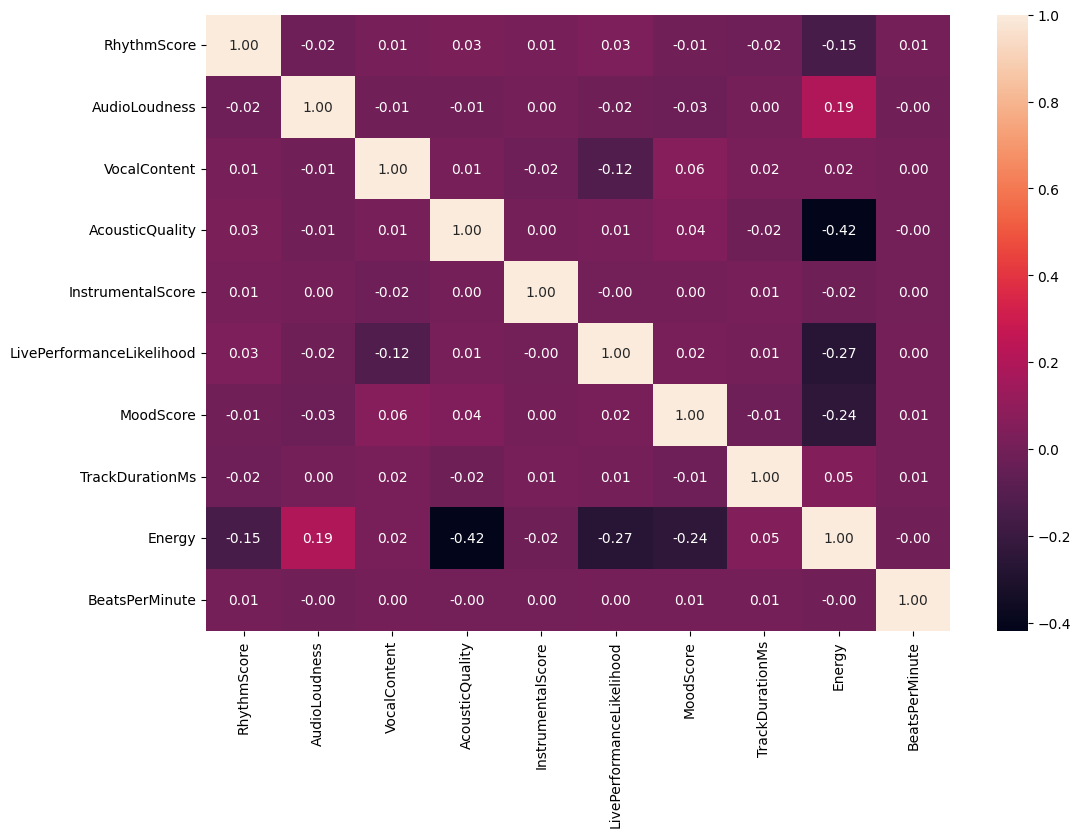

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(), annot=True, fmt=".2f")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

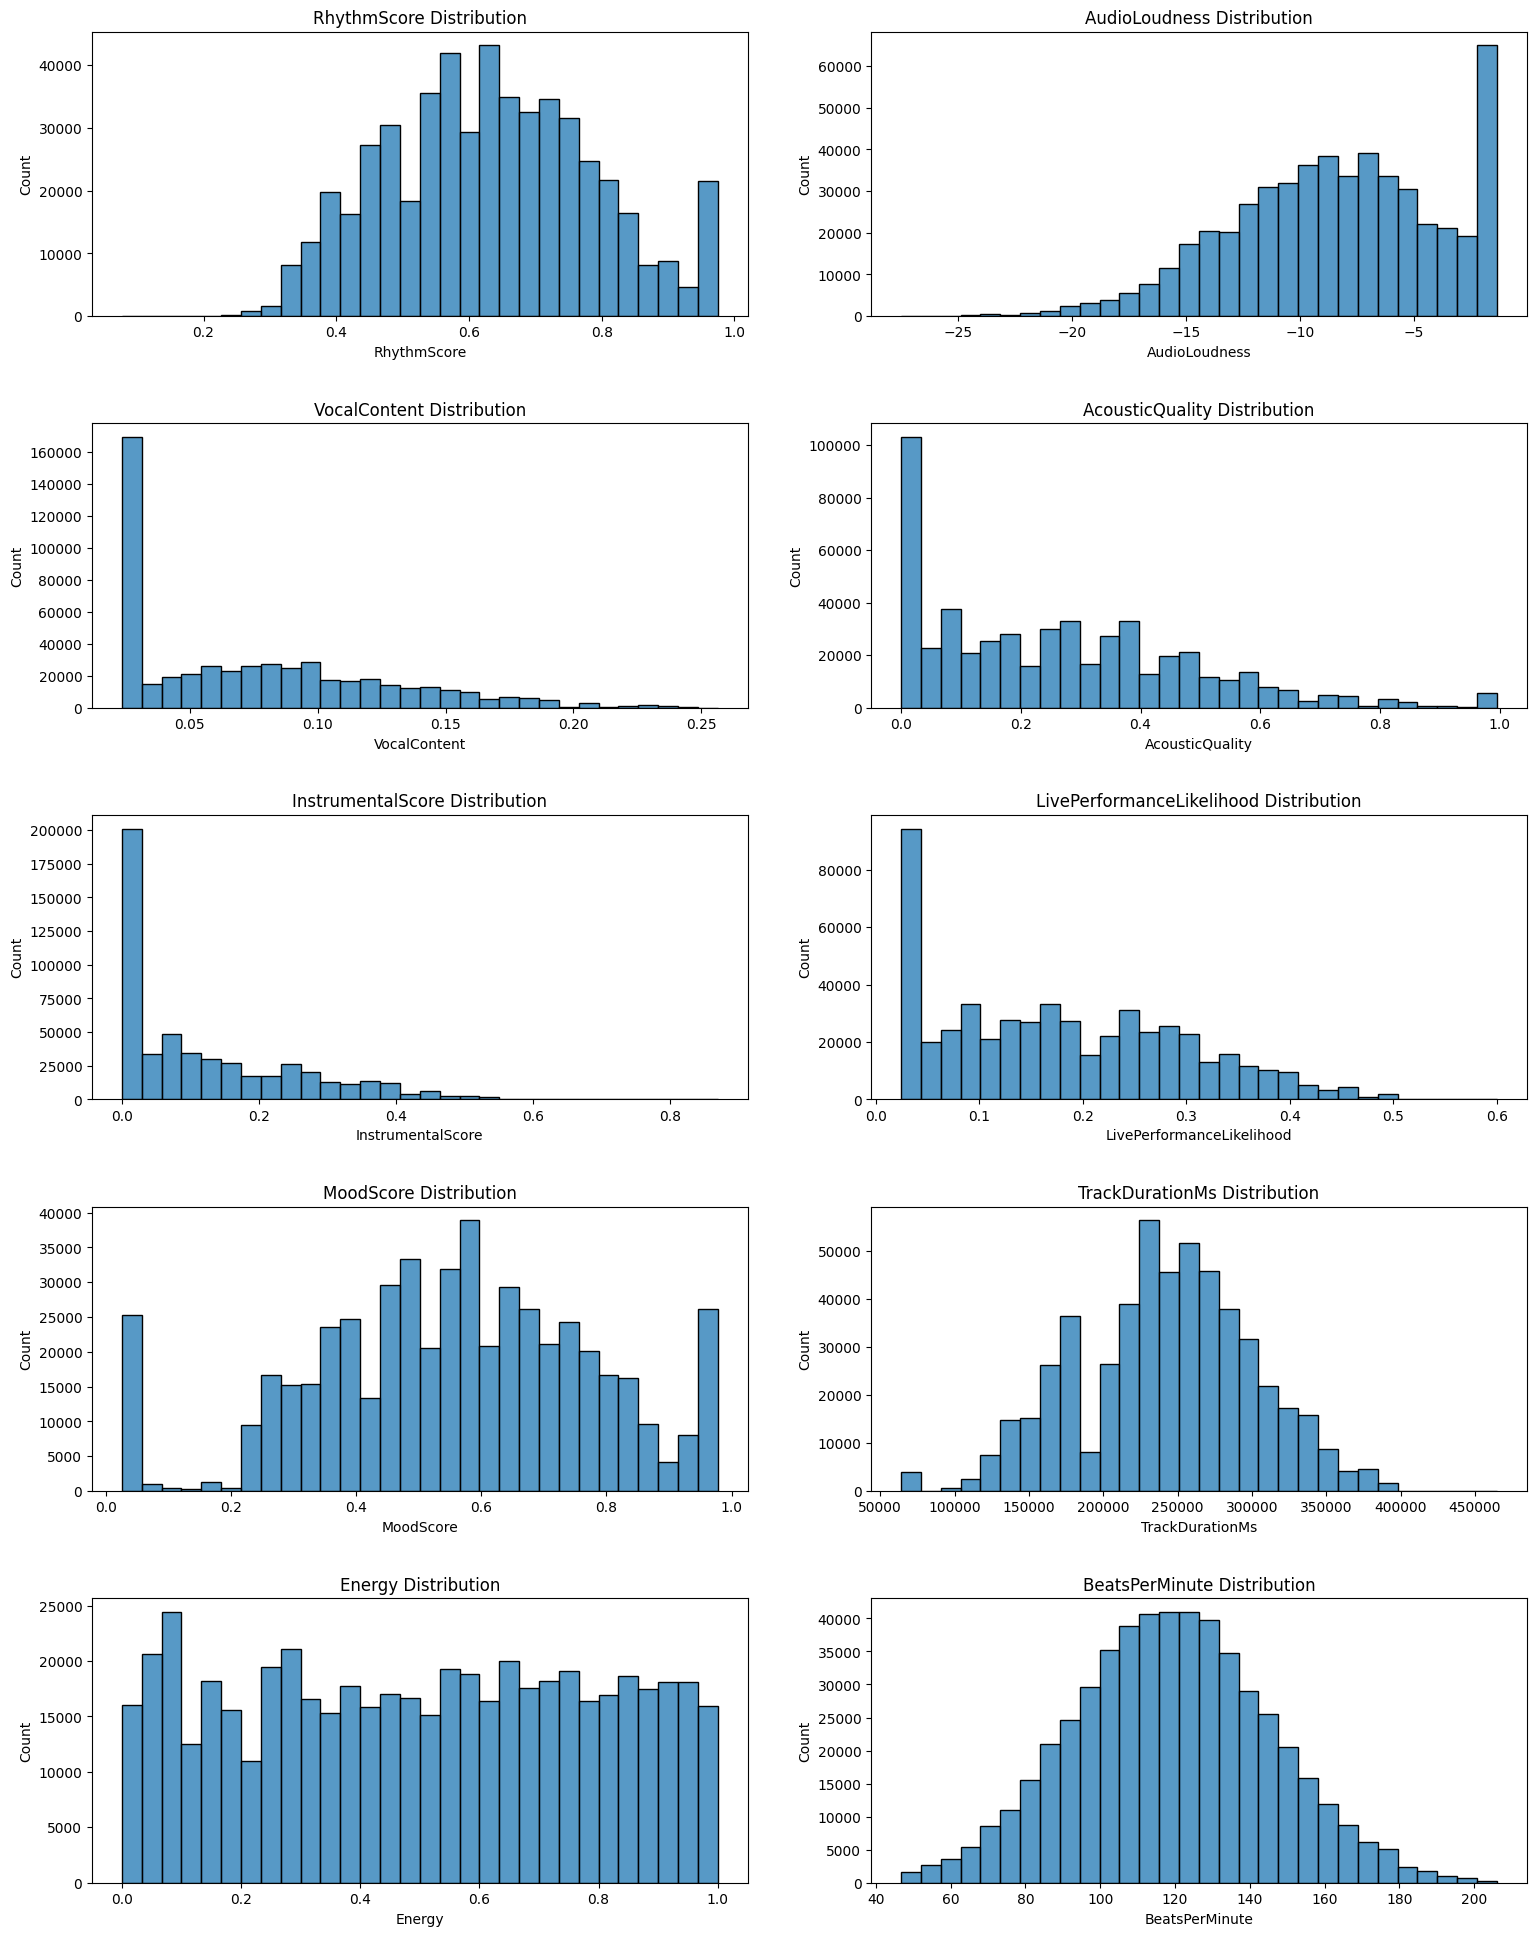

In [ ]:
fig,ax=plt.subplots(5,2,figsize=(16,20))
row=0
col=0
for i in df_train.columns:
    sns.histplot(df_train[i],bins=30,ax=ax[row,col])
    ax[row,col].set_title(f'{i} Distribution')
    col += 1

    if col == 2:
        col = 0
        row += 1
plt.tight_layout(pad=3.0)
plt.show()

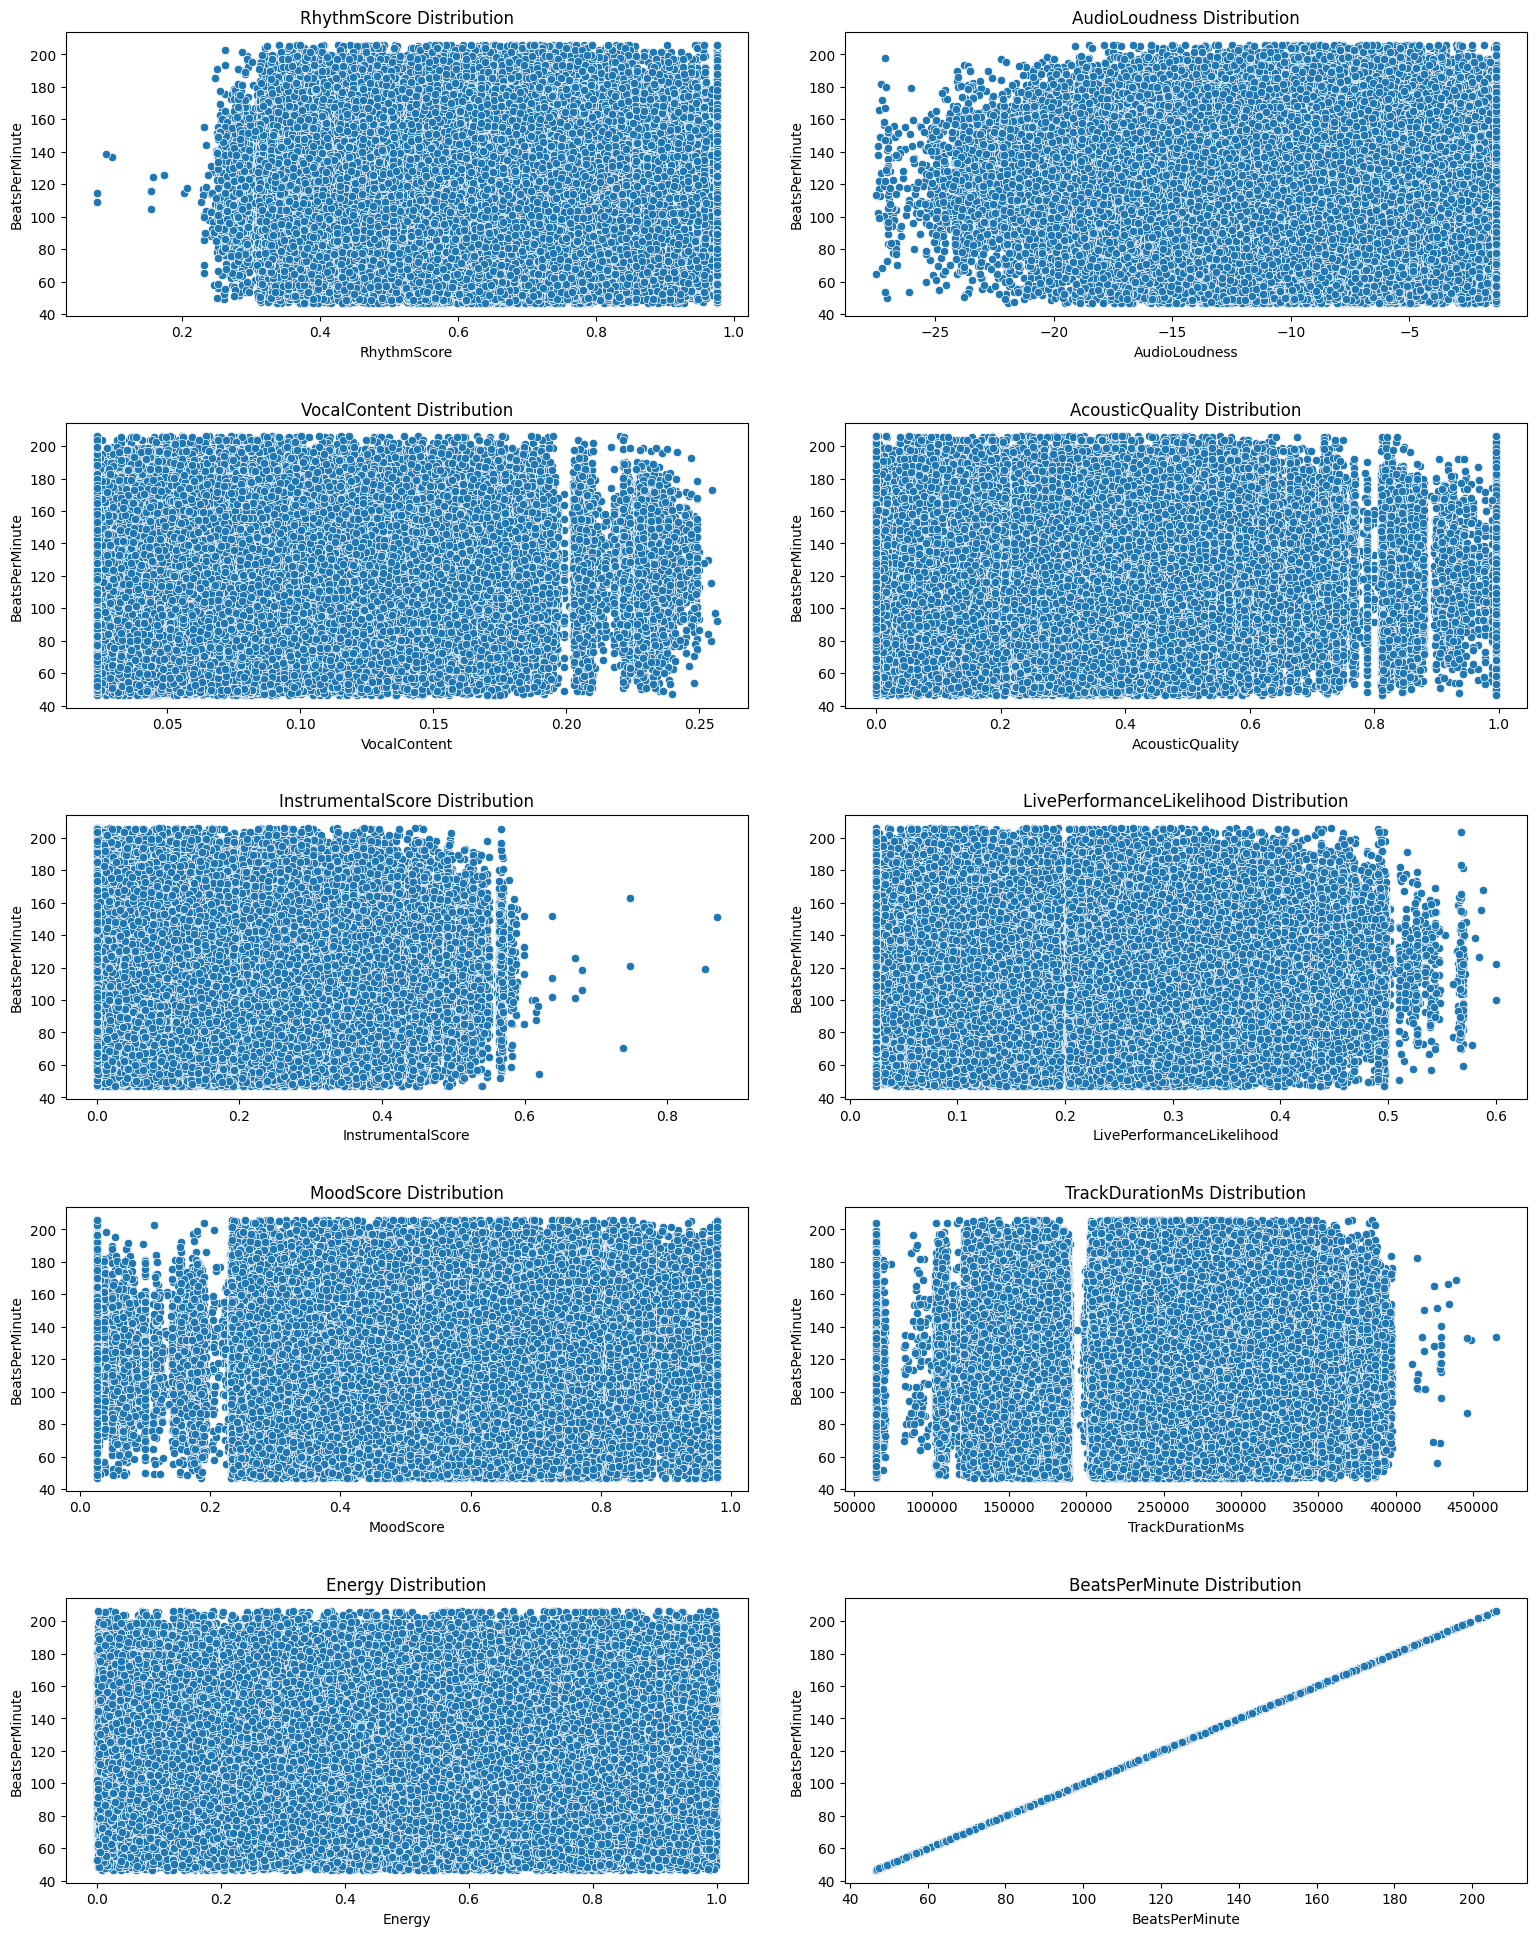

In [ ]:
fig,ax=plt.subplots(5,2,figsize=(16,20))
row=0
col=0
for i in df_train.columns:
    sns.scatterplot(x=df_train[i], y=df_train['BeatsPerMinute'],ax=ax[row,col])
    ax[row,col].set_title(f'{i} Distribution')
    col += 1

    if col == 2:
        col = 0
        row += 1
plt.tight_layout(pad=3.0)
plt.show()

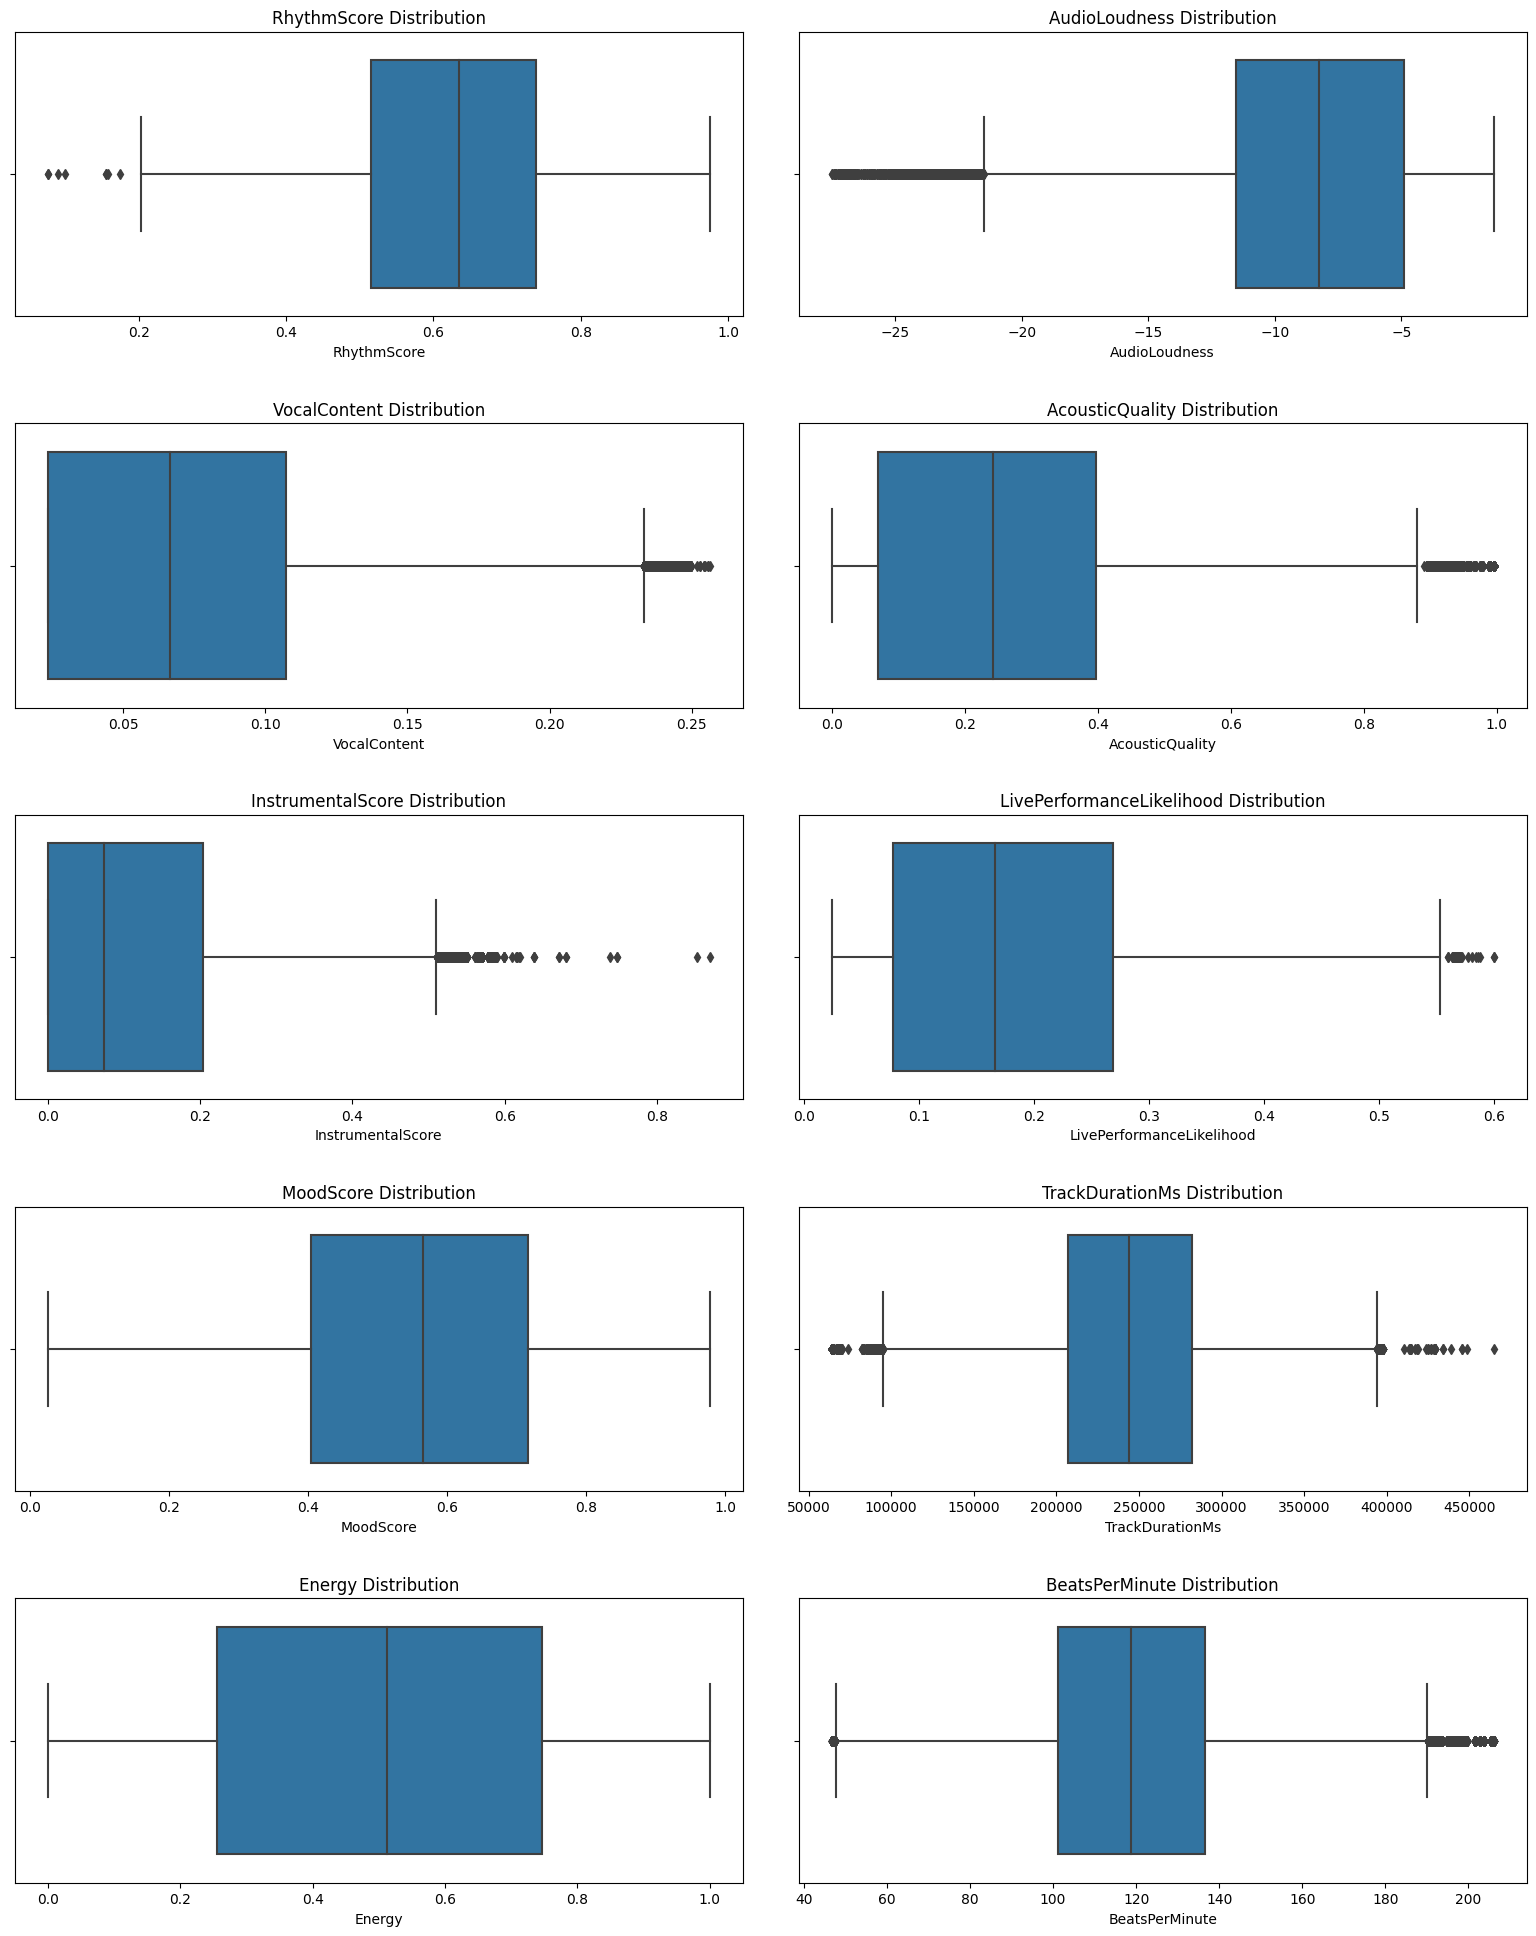

In [ ]:
fig,ax=plt.subplots(5,2,figsize=(16,20))
row=0
col=0
for i in df_train.columns:
    sns.boxplot(x=df_train[i],ax=ax[row,col])
    ax[row,col].set_title(f'{i} Distribution')
    col += 1

    if col == 2:
        col = 0
        row += 1
plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
from sklearn.feature_selection import mutual_info_regression

X = df_train.drop(columns=["BeatsPerMinute"])
y = df_train["BeatsPerMinute"]
mi = mutual_info_regression(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_series)

VocalContent                 0.002706
Energy                       0.001160
AcousticQuality              0.000804
RhythmScore                  0.000681
LivePerformanceLikelihood    0.000605
TrackDurationMs              0.000369
MoodScore                    0.000308
AudioLoudness                0.000271
InstrumentalScore            0.000000
dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
x=df_train.drop('BeatsPerMinute',axis=1)
y=df_train['BeatsPerMinute']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_dev,x_test,y_dev,y_test=train_test_split(x_test,y_test,test_size=0.5,random_state=42)
x

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
id,,,,,,,,,
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400
2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333
...,...,...,...,...,...,...,...,...,...
524159,0.796831,-13.405645,0.023500,0.504738,0.000001,0.191414,0.668079,135528.3189,0.004400
524160,0.975000,-12.132914,0.077379,0.069462,0.262320,0.124818,0.288946,240709.3918,0.447067
524161,0.542958,-1.357000,0.071390,0.168978,0.000001,0.313912,0.586868,344858.2321,0.718800


In [ ]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as m
m1=LinearRegression()
m1.fit(x_train,y_train)


print("train")
y_hat=m1.predict(x_test)
print('R^2:',m.r2_score(y_test,y_hat))
print('MAE:',m.mean_absolute_error(y_test,y_hat))
print('RMSE:',m.mean_squared_error(y_test,y_hat))
print('RMSE:',np.sqrt(m.mean_squared_error(y_test,y_hat)))


print('test')
y_hat=m1.predict(x_test)
print('R^2:',m.r2_score(y_test,y_hat))
print('MAE:',m.mean_absolute_error(y_test,y_hat))
print('RMSE:',m.mean_squared_error(y_test,y_hat))
print('RMSE:',np.sqrt(m.mean_squared_error(y_test,y_hat)))

train
R^2: 8.788338068033141e-05
MAE: 21.227679422178333
RMSE: 702.0717770939796
RMSE: 26.49663709027958
test
R^2: 8.788338068033141e-05
MAE: 21.227679422178333
RMSE: 702.0717770939796
RMSE: 26.49663709027958


In [ ]:
from catboost import  CatBoostRegressor
from sklearn.model_selection import GridSearchCV
modle=CatBoostRegressor(verbose=False)
modle.fit(x_train,y_train)
print("train")
y_hat=modle.predict(x_train)
print('R^2:',m.r2_score(y_train,y_hat))
print('MAE:',m.mean_absolute_error(y_train,y_hat))
print('RMSE:',m.mean_squared_error(y_train,y_hat))
print('RMSE:',np.sqrt(m.mean_squared_error(y_train,y_hat)))


print('dev')
y_hat=modle.predict(x_dev)
print('R^2:',m.r2_score(y_dev,y_hat))
print('MAE:',m.mean_absolute_error(y_dev,y_hat))
print('RMSE:',m.mean_squared_error(y_dev,y_hat))
print('RMSE:',np.sqrt(m.mean_squared_error(y_dev,y_hat)))


print("test")
y_hat=modle.predict(x_test)
print('R^2:',m.r2_score(y_test,y_hat))
print('MAE:',m.mean_absolute_error(y_test,y_hat))
print('RMSE:',m.mean_squared_error(y_test,y_hat))
print('RMSE:',np.sqrt(m.mean_squared_error(y_test,y_hat)))

train
R^2: 0.03514928414063789
MAE: 20.815403602370143
RMSE: 675.8660257135871
RMSE: 25.997423443748943
dev
R^2: -0.003843523748219946
MAE: 21.220500214111254
RMSE: 701.9861875910213
RMSE: 26.49502193981015
test
R^2: -0.003253296944213613
MAE: 21.26689413290309
RMSE: 704.4177316726885
RMSE: 26.540869082844452


In [ ]:
from xgboost import XGBRegressor
import sklearn.metrics as m
modle=XGBRegressor(booster='gbtree',n_estimators=1500,learning_rate=0.1,max_depth=7,gamma=1, reg_alpha=0.5, reg_lambda=1,min_child_weight=5)
modle.fit(x_train,y_train,eval_set=[(x_dev,y_dev)],verbose=100)


print("train")
y_hat=modle.predict(x_train)
print('R^2:',m.r2_score(y_train,y_hat))
print('MAE:',m.mean_absolute_error(y_train,y_hat))
print('RMSE:',m.mean_squared_error(y_train,y_hat))
print('RMSE:',np.sqrt(m.mean_squared_error(y_train,y_hat)))


print('dev')
y_hat=modle.predict(x_dev)
print('R^2:',m.r2_score(y_dev,y_hat))
print('MAE:',m.mean_absolute_error(y_dev,y_hat))
print('RMSE:',m.mean_squared_error(y_dev,y_hat))
print('RMSE:',np.sqrt(m.mean_squared_error(y_dev,y_hat)))


print("test")
y_hat=modle.predict(x_test)
print('R^2:',m.r2_score(y_test,y_hat))
print('MAE:',m.mean_absolute_error(y_test,y_hat))
print('RMSE:',m.mean_squared_error(y_test,y_hat))
print('RMSE:',np.sqrt(m.mean_squared_error(y_test,y_hat)))

[0]	validation_0-rmse:26.44361
[100]	validation_0-rmse:26.47550
[200]	validation_0-rmse:26.51712
[300]	validation_0-rmse:26.56087
[400]	validation_0-rmse:26.60078
[500]	validation_0-rmse:26.64137
[600]	validation_0-rmse:26.67836
[700]	validation_0-rmse:26.71315
[800]	validation_0-rmse:26.74446
[900]	validation_0-rmse:26.77683
[1000]	validation_0-rmse:26.80700
[1100]	validation_0-rmse:26.84093
[1200]	validation_0-rmse:26.87028
[1300]	validation_0-rmse:26.90026
[1400]	validation_0-rmse:26.93231
[1499]	validation_0-rmse:26.95412
train
R^2: 0.3194222927057322
MAE: 17.29674952446654
RMSE: 476.7362895186875
RMSE: 21.83429159644726
dev
R^2: -0.03893351112057264
MAE: 21.592862510365627
RMSE: 726.5245602311712
RMSE: 26.954119541012115
test
R^2: -0.038695272746867904
MAE: 21.635805519186643
RMSE: 729.3027295859248
RMSE: 27.005605521556536


In [ ]:
r=pd.read_csv('/kaggle/input/playground-series-s5e9/sample_submission.csv')
r['BeatsPerMinute']=modle.predict(df_test)
r.to_csv('submission.csv',index=False)